# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

## Step 1: Read in Data

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import norm 
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
import fiona
from shapely.geometry import Point, Polygon
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
import seaborn as sns
plt.style.use('seaborn')
sns.set(style="white")

In [2]:
hf = pd.read_csv('kc_house_data_train.csv')


In [3]:
len(hf)

17290

In [4]:
hf.keys()

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

/Users/astroraf/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 540739.55 and sigma = 373308.18



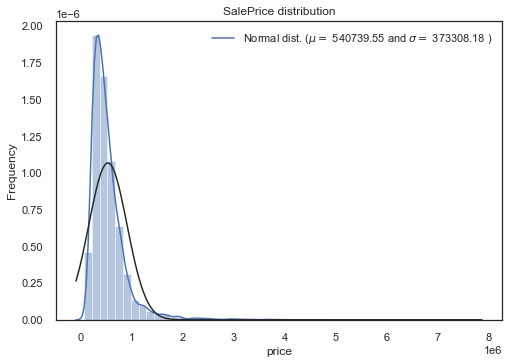

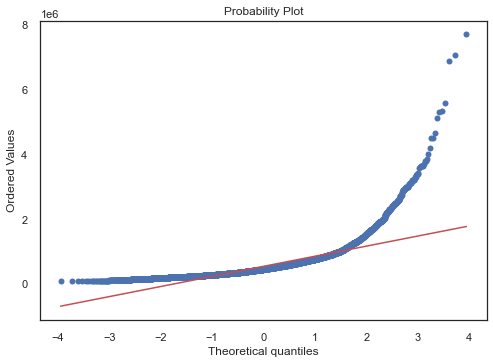

Skewness: 4.282599
Kurtosis: 38.520298


In [5]:
# Plot Histogram
sns.distplot(hf['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(hf['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(hf['price'], plot=plt)
plt.show()

print("Skewness: %f" % hf['price'].skew())
print("Kurtosis: %f" % hf['price'].kurt())

NameError: name 'street_map' is not defined

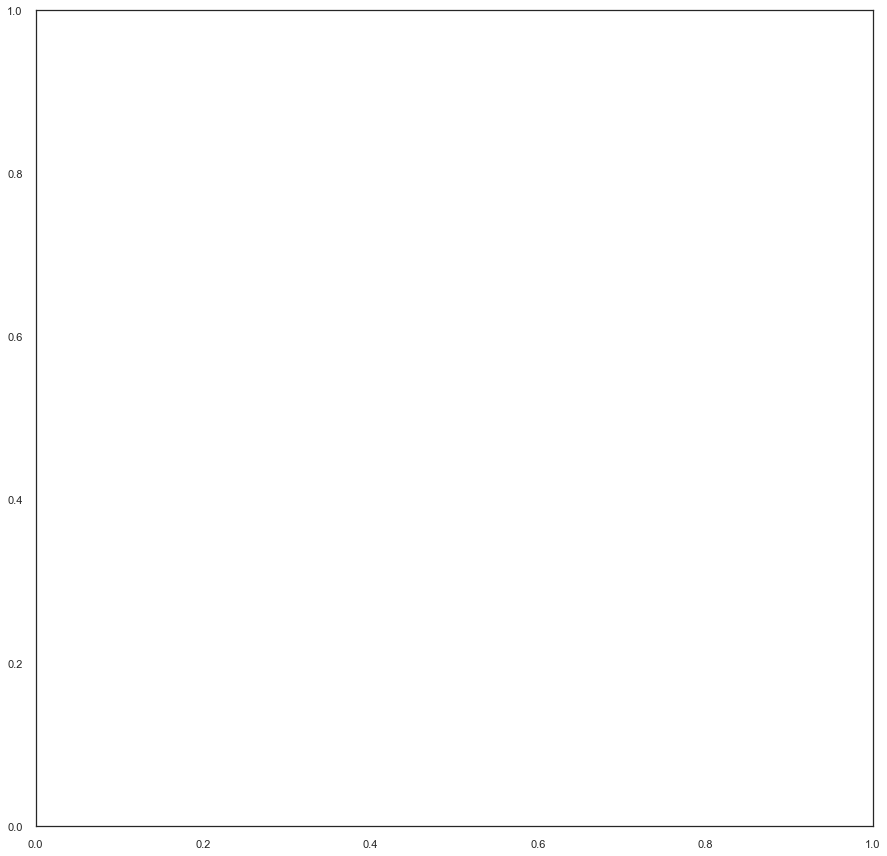

In [6]:
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax)

In [7]:
hf.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
sqliv = hf.loc[hf['sqft_living'] <= 6850]
len(sqliv)

17260

In [9]:
sqlot = hf.loc[hf['sqft_lot'] <= 425000]
len(sqlot)

17260

In [10]:
floors = hf.loc[hf['floors'] <= 3.0]
len(floors)

17283

In [11]:
view = hf.loc[hf['view'] >= 3]
len(view)

680

In [12]:
cond = hf.loc[hf['condition'] >= 5 ]
len(cond)

1367

In [13]:
sqabove = hf.loc[hf['sqft_above'] <= 5800]
len(sqabove)

17260

In [14]:
sqliv15 = hf.loc[hf['sqft_living15'] <= 4820]
len(sqliv15)

17260

In [15]:
sqlot15 = hf.loc[hf['sqft_lot15'] <= 250000]
len(sqlot15)

17260

In [16]:
sqbase = hf.loc[hf['sqft_basement'] <= 2180]
len(sqbase)

17261

In [17]:
hf == 0

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,True,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
17286,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
17287,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
17288,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False


In [18]:
hf[hf['bathrooms'] >= 5.5]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
940,940,622069006,20140820T000000,1500000.0,4,5.50,6550,217374,1.0,0,...,11,5400,1150,2006,0,98058,47.4302,-122.095,4110,50378
1327,1327,2424059170,20150219T000000,900000.0,5,6.00,7120,40806,2.0,0,...,12,5480,1640,2007,0,98006,47.5451,-122.114,3440,36859
2232,2232,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
2505,2505,9175600025,20141007T000000,800000.0,7,6.75,7480,41664,2.0,0,...,11,5080,2400,1953,0,98166,47.4643,-122.368,2810,33190
3168,3168,2524069097,20140509T000000,2238890.0,5,6.50,7270,130017,2.0,0,...,12,6420,850,2010,0,98027,47.5371,-121.982,1800,44890
3193,3193,2626069030,20150209T000000,1940000.0,4,5.75,7220,223462,2.0,0,...,12,6220,1000,2000,0,98053,47.7097,-122.013,2680,7593
3195,3195,6447300265,20141014T000000,4000000.0,4,5.50,7080,16573,2.0,0,...,12,5760,1320,2008,0,98039,47.6151,-122.224,3140,15996
3275,3275,1225069038,20140505T000000,2280000.0,7,8.00,13540,307752,3.0,0,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800
3425,3425,424049043,20140811T000000,450000.0,9,7.50,4050,6504,2.0,0,...,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866
3833,3833,8835770170,20140822T000000,1488000.0,5,6.00,6880,279968,2.0,0,...,12,4070,2810,2007,0,98045,47.4624,-121.779,4690,256803


In [19]:
geometry = [Point(xy) for xy in zip(hf['long'], hf['lat'])]
geometry[:3]

In [20]:
geo_df = gpd.GeoDataFrame(hf,
                         crs = crs,
                         geometry = geometry)
geo_df.columns

NameError: name 'crs' is not defined

NameError: name 'street_map' is not defined

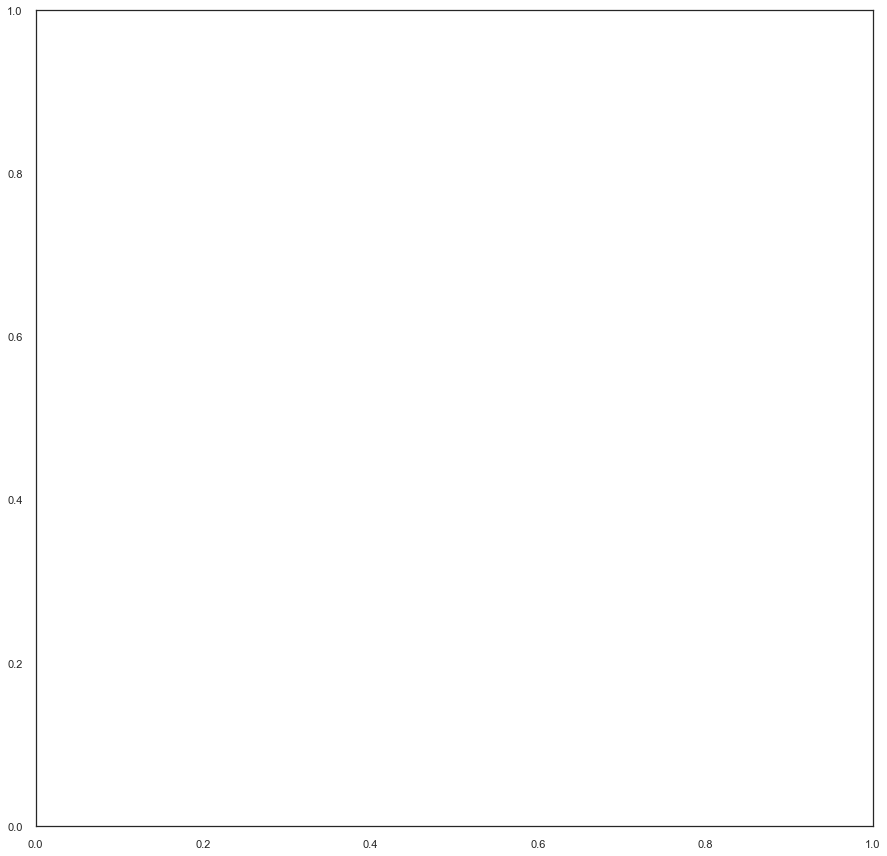

In [21]:
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')
# geo_df[geo_df['Unnamed: 0'] >= 1000].plot(ax=ax, markersize = 20, color = 'blue', marker = "^", label = "Housing ID")
# geo_df[geo_df['Unnamed: 0'] <= 1000].plot(ax=ax, markersize = 20, color = 'red', marker = "o", label = "Housing ID")
geo_df[geo_df['price'] <= 7000000].plot(ax=ax, markersize = 20, color = 'green', marker = "+", label = "Housing ID")




plt.legend(prop={'size': 15})

In [22]:
hf.shape

(17290, 22)

In [23]:
hf[500:540]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
500,500,8955800045,20150512T000000,530000.0,2,2.25,2080,11285,1.0,0,...,8,1180,900,1954,0,98042,47.3628,-122.147,2590,13048
501,501,2314300200,20141021T000000,449500.0,4,3.00,2580,7299,2.0,0,...,8,2580,0,1998,0,98058,47.4646,-122.150,2250,6165
502,502,9528104360,20140912T000000,435000.0,2,1.50,901,1245,3.0,0,...,7,901,0,2001,0,98115,47.6774,-122.325,1138,1137
503,503,4177100005,20150403T000000,635000.0,4,2.50,2970,7961,1.0,0,...,8,2020,950,1969,0,98125,47.7118,-122.290,1410,7959
504,504,8856960260,20140521T000000,332500.0,3,2.25,1800,10500,2.0,0,...,7,1800,0,1995,0,98038,47.3879,-122.032,1870,8555
505,505,1828001220,20141007T000000,550000.0,5,2.75,3000,9473,1.0,0,...,8,1500,1500,1966,0,98052,47.6567,-122.130,2050,8820
506,506,3066400710,20150407T000000,720000.0,3,2.50,2520,10012,2.0,0,...,10,2520,0,1987,0,98074,47.6295,-122.051,2680,10071
507,507,624110610,20140515T000000,1085000.0,4,3.25,3740,12080,1.0,0,...,10,2000,1740,1988,0,98077,47.7214,-122.056,4210,15277
508,508,4040800260,20140616T000000,418000.0,4,1.50,1220,10580,1.0,0,...,7,1220,0,1965,0,98008,47.6205,-122.116,1350,7800
509,509,5019500215,20150115T000000,495000.0,2,1.75,1280,4000,1.0,0,...,7,730,550,1929,0,98116,47.5798,-122.383,2250,5382


In [24]:
hf.corr()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
Unnamed: 0,1.000000e+00,-0.006139,-0.012306,-0.010271,-0.004940,-0.008900,-0.003500,0.010599,-0.008845,-6.278161e-07,...,-0.005015,-0.003406,-0.012104,0.007496,-0.003423,0.006218,0.002470,-0.006992,-0.008961,0.000463
id,-6.138777e-03,1.000000,-0.015644,-0.001529,0.003833,-0.014251,-0.129837,0.017126,0.000101,1.259374e-02,...,0.003163,-0.013932,-0.003516,0.013697,-0.019560,-0.008166,-0.001865,0.017388,-0.007494,-0.139605
price,-1.230630e-02,-0.015644,1.000000,0.305106,0.524335,0.703540,0.086803,0.256985,0.275779,3.954851e-01,...,0.666215,0.607760,0.323312,0.056450,0.117770,-0.048958,0.302394,0.019327,0.585567,0.081423
bedrooms,-1.027127e-02,-0.001529,0.305106,1.000000,0.507867,0.570428,0.029375,0.172975,-0.008581,7.974076e-02,...,0.354679,0.472492,0.300085,0.153769,0.013679,-0.147515,-0.002170,0.124279,0.387589,0.026665
bathrooms,-4.939574e-03,0.003833,0.524335,0.507867,1.000000,0.755270,0.085470,0.497967,0.065848,1.888170e-01,...,0.664191,0.686853,0.282700,0.507761,0.048140,-0.201527,0.023074,0.221308,0.568080,0.086499
sqft_living,-8.900440e-03,-0.014251,0.703540,0.570428,0.755270,1.000000,0.166810,0.357169,0.109738,2.833358e-01,...,0.762929,0.876696,0.435529,0.319397,0.051448,-0.195893,0.052646,0.234453,0.755066,0.179570
sqft_lot,-3.500101e-03,-0.129837,0.086803,0.029375,0.085470,0.166810,1.000000,-0.002205,0.015356,7.305841e-02,...,0.110320,0.180755,0.008065,0.054228,0.004520,-0.126590,-0.082029,0.226190,0.136959,0.701875
floors,1.059874e-02,0.017126,0.256985,0.172975,0.497967,0.357169,-0.002205,1.000000,0.025132,2.588299e-02,...,0.458984,0.528509,-0.247481,0.483657,0.005985,-0.060560,0.048227,0.128795,0.283933,-0.008170
waterfront,-8.844970e-03,0.000101,0.275779,-0.008581,0.065848,0.109738,0.015356,0.025132,1.000000,4.075653e-01,...,0.092234,0.077162,0.083433,-0.021981,0.094268,0.034282,-0.013331,-0.042728,0.091090,0.026895
view,-6.278161e-07,0.012594,0.395485,0.079741,0.188817,0.283336,0.073058,0.025883,0.407565,1.000000e+00,...,0.249554,0.164747,0.279939,-0.049593,0.091291,0.089475,0.003820,-0.077572,0.279999,0.073185


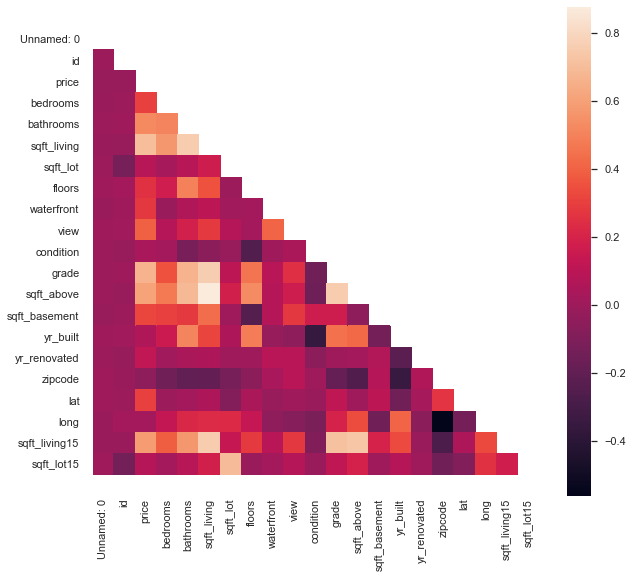

In [25]:
plt.style.use('seaborn')
sns.set(style="white")

# Set up  matplotlib figure (might have to play around with the 
# figsize if your labels aren't so legible and you don't want
# to mess with the labels using matplotlib)
f, ax = plt.subplots(figsize=(10, 9))

# Create an upper triangular matrix to use to get rid of duplicate/
# useless values
mask = np.zeros_like(hf.corr())
mask[np.triu_indices_from(mask)] = True

# plot the heatmap
with sns.axes_style("white"):
    ax = sns.heatmap(hf.corr(), mask=mask, square=True)
    
# fix for mpl bug that cuts off top/bottom of seaborn viz
# credit: https://github.com/mwaskom/seaborn/issues/1773 SalMac86's post
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [26]:
price_corr = hf[hf.columns[:]].corr()['price'][:] 
price_corr.sort_values()

zipcode         -0.048958
id              -0.015644
Unnamed: 0      -0.012306
long             0.019327
condition        0.036099
yr_built         0.056450
sqft_lot15       0.081423
sqft_lot         0.086803
yr_renovated     0.117770
floors           0.256985
waterfront       0.275779
lat              0.302394
bedrooms         0.305106
sqft_basement    0.323312
view             0.395485
bathrooms        0.524335
sqft_living15    0.585567
sqft_above       0.607760
grade            0.666215
sqft_living      0.703540
price            1.000000
Name: price, dtype: float64

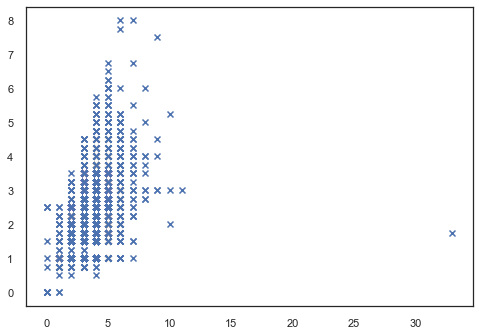

In [27]:
plt.scatter(hf['bedrooms'], hf['bathrooms'], marker ='x');

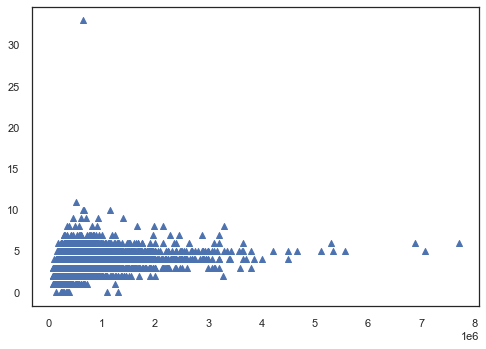

In [28]:
plt.scatter(hf['price'], hf['bedrooms'], marker = '^')

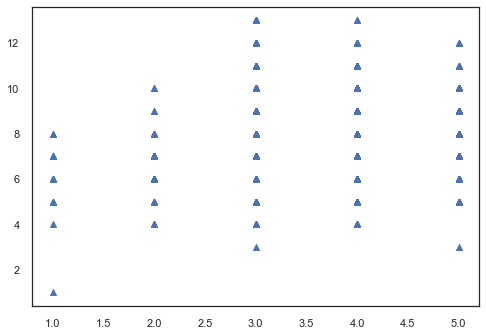

In [29]:
plt.scatter(hf['condition'], hf['grade'], marker = '^')

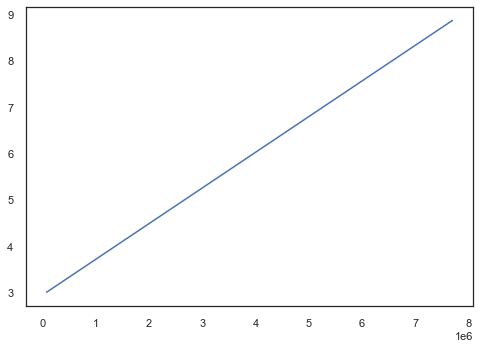

In [30]:
plt.plot(np.unique(hf['price']), np.poly1d(np.polyfit(hf['price'], hf['bedrooms'], 1))(np.unique(hf['price'])))

/Users/astroraf/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='bedrooms'>

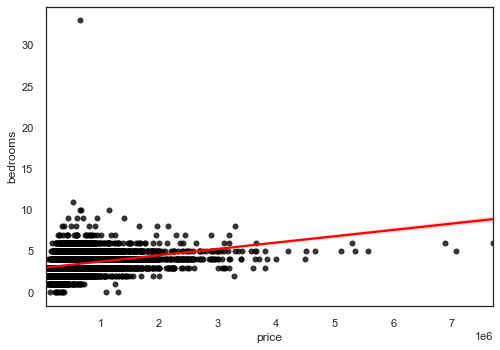

In [31]:

sns.regplot(hf['price'],hf['bedrooms'], scatter_kws={"color": "black"}, line_kws={"color": "red"})

/Users/astroraf/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='bathrooms'>

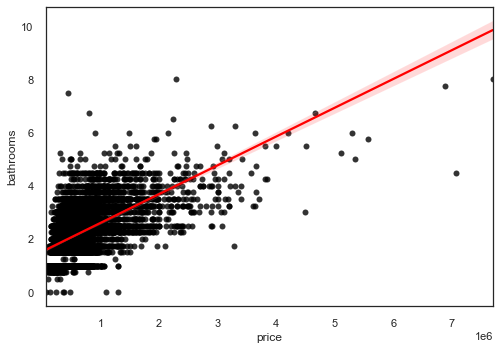

In [32]:
sns.regplot(hf['price'],hf['bathrooms'], scatter_kws={"color": "black"}, line_kws={"color": "red"})

In [33]:
hf[hf['sqft_living'] >= 12000]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3275,3275,1225069038,20140505T000000,2280000.0,7,8.0,13540,307752,3.0,0,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800
10366,10366,6762700020,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


In [34]:
hf['yr_renovated'].unique()

array([   0, 1998, 1983, 1989, 1985, 2002, 1999, 2010, 2015, 1990, 1972,
       2013, 1955, 2001, 2000, 2011, 1956, 2006, 1965, 1987, 2007, 1995,
       2014, 1945, 1993, 1992, 1979, 1980, 1946, 1988, 1958, 1996, 2004,
       1973, 2005, 1994, 2003, 1986, 1981, 1953, 2012, 1991, 1975, 1977,
       1978, 1968, 2009, 1984, 2008, 1967, 1997, 1974, 1982, 1963, 1969,
       1940, 1970, 1971, 1957, 1976, 1960, 1962, 1944, 1959, 1964, 1950,
       1934, 1951, 1948])

<function matplotlib.pyplot.show(close=None, block=None)>

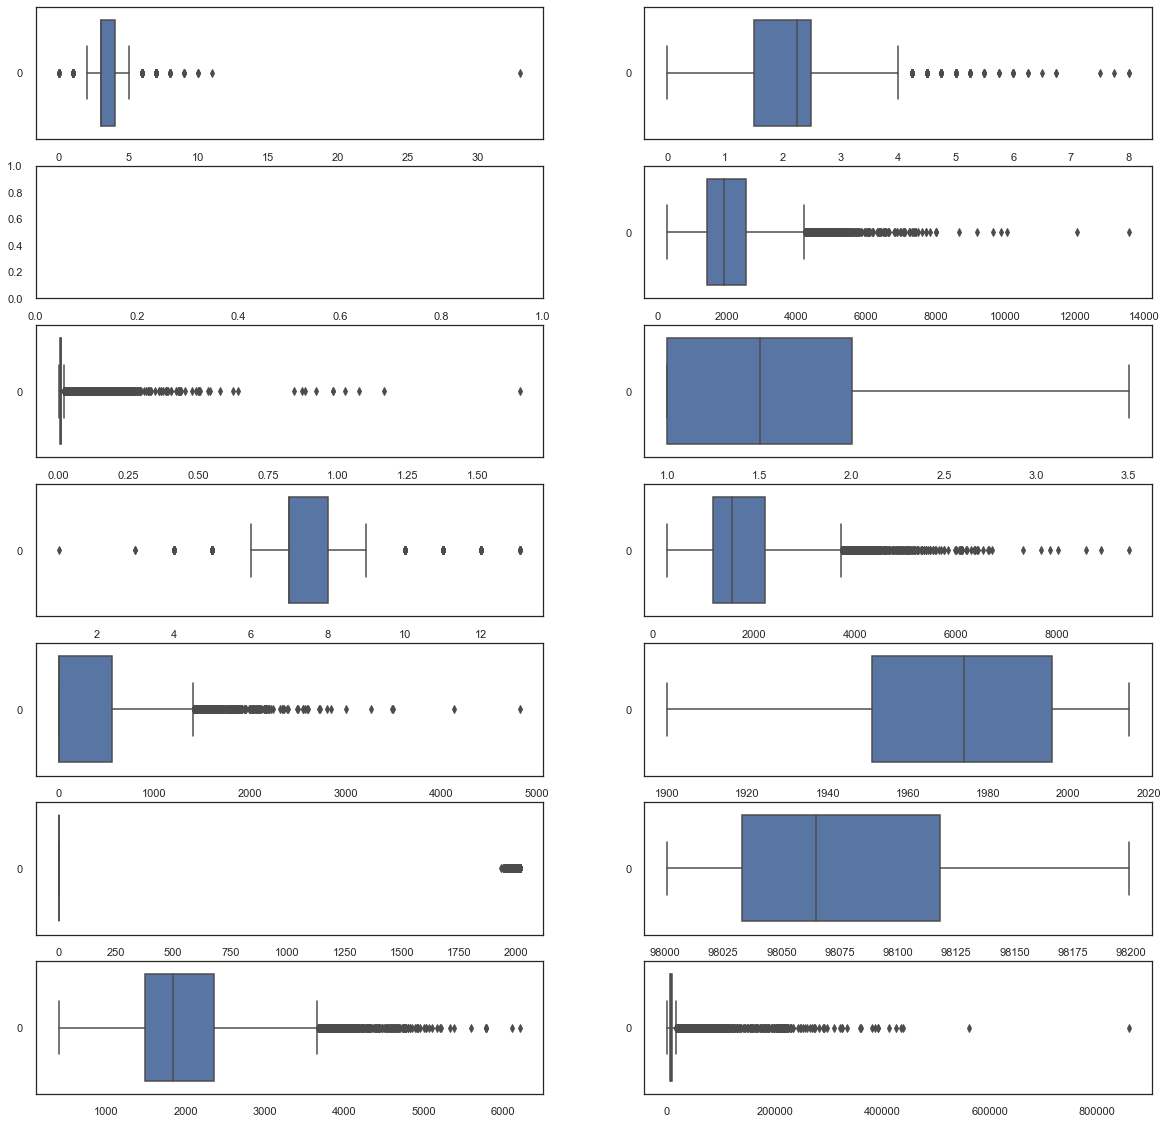

In [35]:
fig, axes = plt.subplots(7,2, figsize = (20, 20))


sns.boxplot(ax = axes[0,0], data = hf['bedrooms'], orient = 'h')
sns.boxplot(ax = axes[0,1], data = hf['bathrooms'], orient = 'h')
sns.boxplot(ax = axes[1,1], data = hf['sqft_living'], orient = 'h')
sns.boxplot(ax = axes[2,0], data = hf['sqft_lot'], orient = 'h')
sns.boxplot(ax = axes[2,1], data = hf['floors'], orient = 'h')
sns.boxplot(ax = axes[3,0], data = hf['grade'], orient = 'h')
sns.boxplot(ax = axes[3,1], data = hf['sqft_above'], orient = 'h')
sns.boxplot(ax = axes[4,0], data = hf['sqft_basement'], orient = 'h')
sns.boxplot(ax = axes[4,1], data = hf['yr_built'], orient = 'h')
sns.boxplot(ax = axes[5,0], data = hf['yr_renovated'], orient = 'h')
sns.boxplot(ax = axes[5,1], data = hf['zipcode'], orient = 'h')
sns.boxplot(ax = axes[6,0], data = hf['sqft_living15'], orient = 'h')
sns.boxplot(ax = axes[6,1], data = hf['sqft_lot15'], orient = 'h')


plt.show

In [111]:
hf.grade.value_counts()

7     7183
8     4848
9     2099
6     1648
10     893
11     319
5      192
12      72
4       22
13      11
3        2
1        1
Name: grade, dtype: int64

In [37]:
a = hf.zipcode.unique()
hf['geometry']

KeyError: 'geometry'

In [38]:
print(sorted(a))

[98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029, 98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042, 98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070, 98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166, 98168, 98177, 98178, 98188, 98198, 98199]


In [39]:
hf.keys()

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [40]:
numerical = ['price', 'sqft_living', 'sqft_lot', 'view',
             'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15'
    
]

categorical = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade', 'zipcode'
    
]

houses = hf[numerical + categorical]

houses.shape

(17290, 17)

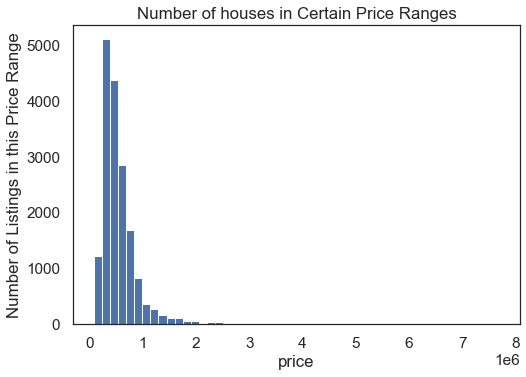

In [73]:
sns.set_context('notebook', font_scale = 1.4)

sns.distplot(
    hf['price'], norm_hist=False, kde=False, bins=50, hist_kws={"alpha": 1}
).set(xlabel='price', ylabel='Number of Listings in this Price Range', title='Number of houses in Certain Price Ranges');
plt.savefig('PriceRange_Count')

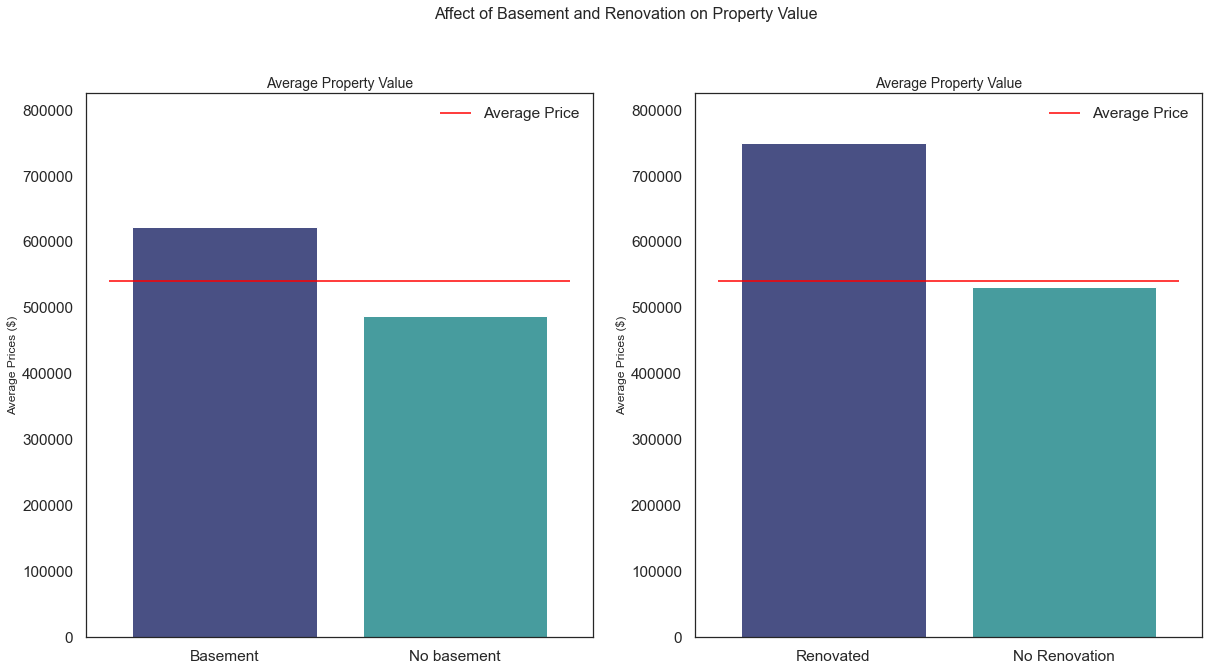

In [71]:
# Take in all the houses that have a basement and do not have basement and calculate the mean pricee for these 
# houses 
basement = hf[(hf["sqft_basement"] != 0)]
basement_mean = basement.price.mean()
no_basement = hf[(hf["sqft_basement"] == 0)]
no_basement_mean = no_basement.price.mean()

#mean values to plot
renovated = hf[(hf["yr_renovated"] > 0)]
renovated_mean = renovated.price.mean()
not_renovated = hf[(hf["yr_renovated"] == 0)]
not_renovated_mean = not_renovated.price.mean()

#prepare plot labels
label_basement = ["Basement", "No basement"]
values_basement = [basement_mean, no_basement_mean]
label_renovation = ["Renovated", "No Renovation"]
values_renovation = [renovated_mean, not_renovated_mean]

# Barplots
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.barplot(ax=ax[0], x=label_basement, y=values_basement, palette="mako")
sns.barplot(ax=ax[1], x=label_renovation, y=values_renovation, palette="mako")

hf_mean_price = hf.price.mean()

ax[0].hlines(hf_mean_price, -.5 ,1.5, colors="red", label="Average Price") #plot average price horizontal line
ax[1].hlines(hf_mean_price, -.5 ,1.5, colors="red", label="Average Price") #plot average price horizontal line

#prettify graph
ax[0].set_ylabel("Average Prices ($)", size=12)
ax[0].set_title("Average Property Value", size=14)
ax[0].set_ylim(0,1.1*renovated_mean)
ax[0].legend()

ax[1].set_ylabel("Average Prices ($)", size=12)
ax[1].set_title("Average Property Value", size=14, )
ax[1].set_ylim(0,1.1*renovated_mean)
ax[1].legend()

plt.suptitle("Affect of Basement and Renovation on Property Value", size=16, y=1)

#uncomment below to export image
# plt.savefig("images/basement_renovation_value.png",bbox_inches = "tight")
plt.savefig('basement_renov')
plt.show();

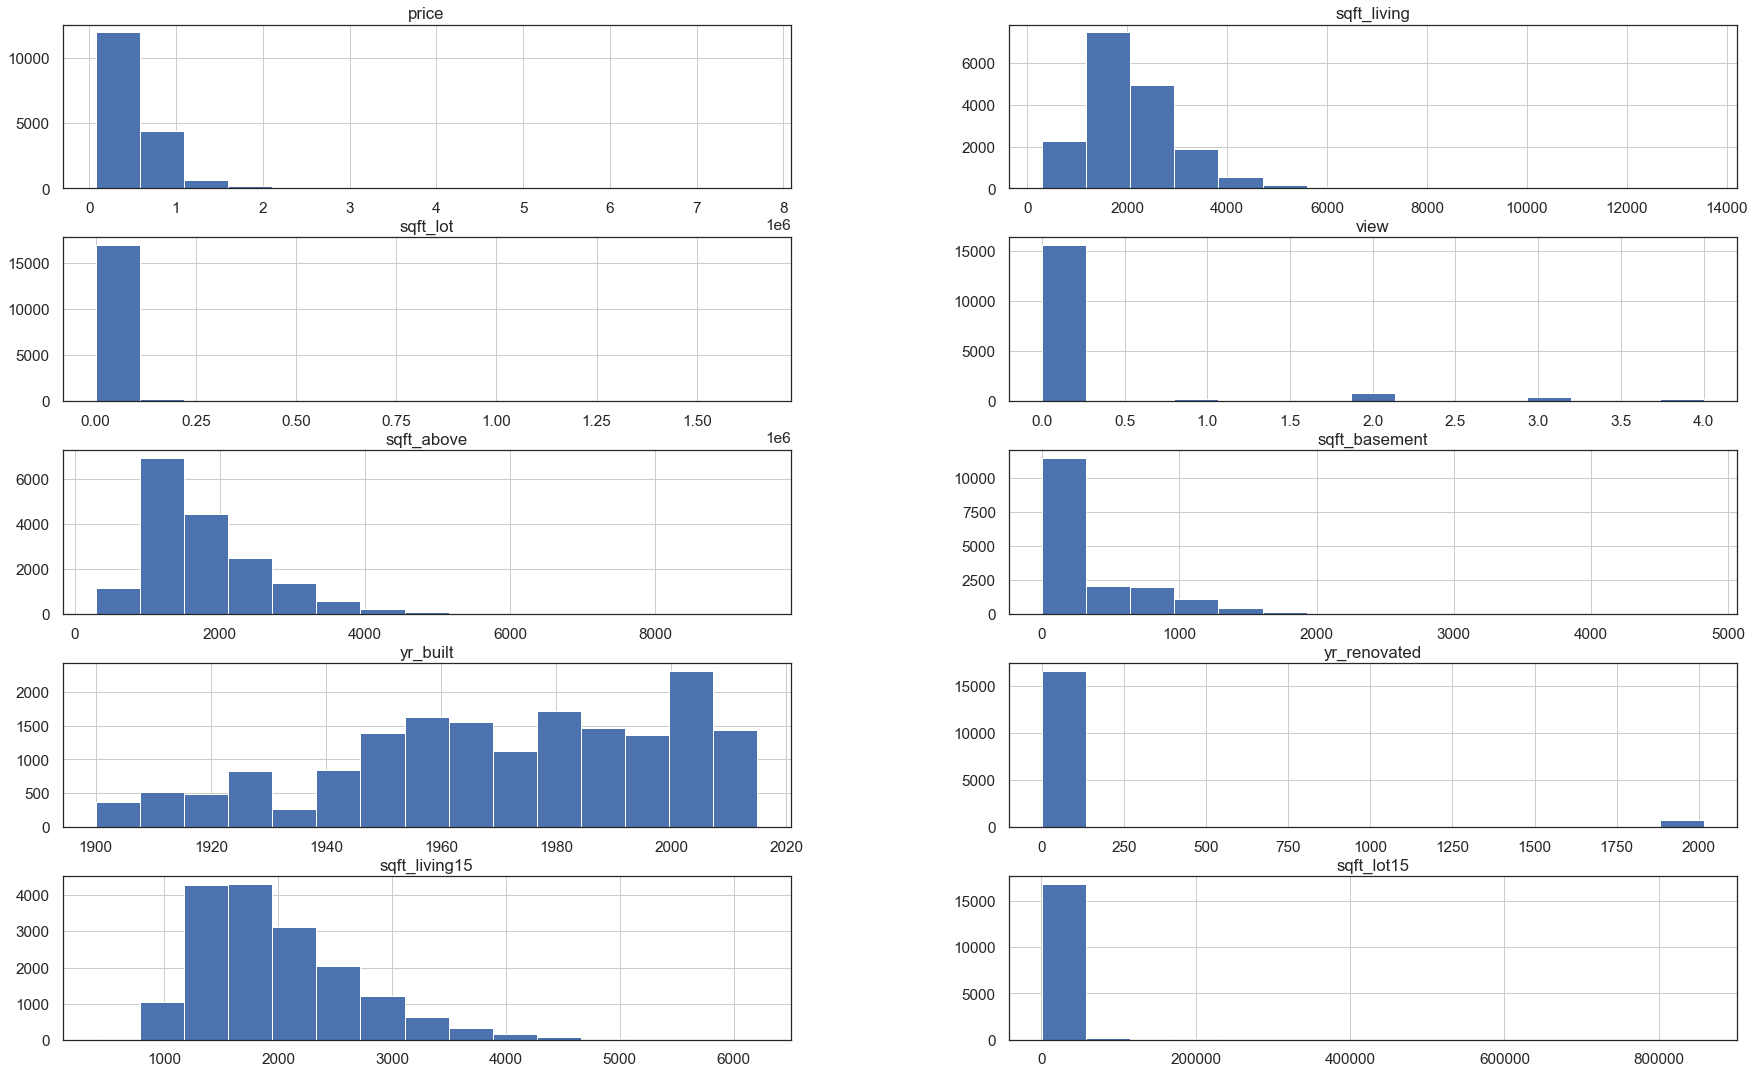

In [42]:
hf[numerical].hist(bins=15, figsize=(30, 50), layout=(13, 2));


In [114]:
mean = hf.groupby("grade")["price"].mean()
print(mean)
mean_data = hf.price.mean()
print(mean_data)
score = np.arange(1,6)
score

grade
1     1.420000e+05
3     1.685000e+05
4     2.106386e+05
5     2.438372e+05
6     3.026820e+05
7     4.025267e+05
8     5.430105e+05
9     7.741618e+05
10    1.072903e+06
11    1.507967e+06
12    2.314347e+06
13    4.002727e+06
Name: price, dtype: float64
540739.5486408329


array([1, 2, 3, 4, 5])

In [145]:
mean_data = hf.price.mean()
mean_data

540739.5486408329

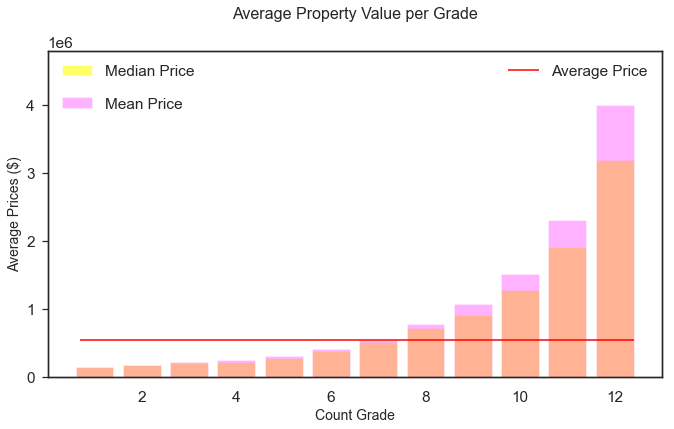

<Figure size 576x396 with 0 Axes>

In [140]:
mean = hf.groupby("grade")["price"].mean()
median = hf.groupby("grade")["price"].median()
mean_data = hf.price.mean()
score = np.arange(1,13)


fig, ax = plt.subplots(figsize=(11,6))
ax2 = ax.twinx() #set ax2 on same x axis as ax
ax3 = ax.twinx() #same as above, for hline
width = 0.8

ax.bar(x=score, height=median, width=width,
       label="Median Price", color="yellow", alpha=0.6)

ax2.bar(x=score, height=mean, width=width,
        label="Mean Price", color="fuchsia", alpha=0.3)

ax3.hlines(mean_data, .7 ,12.4, colors="red", label="Average Price")
ax.set_ylim(0,1.2*mean.max())
ax2.set_ylim(0,1.2*mean.max())
ax3.set_ylim(0,1.2*mean.max())
ax2.yaxis.set_visible(False) #hide the 2nd axis
ax3.yaxis.set_visible(False)
ax.legend(bbox_to_anchor=(0,0,1,1), loc="upper left")
ax2.legend(bbox_to_anchor=(0,-.1,1,1), loc="upper left")
ax3.legend(bbox_to_anchor=(0,0,1,1), loc="upper right")

ax.set_ylabel("Average Prices ($)", size=14)
ax.set_xlabel("Count Grade", size=14)


plt.title("Average Property Value per Grade", size=16, y=1.08)
plt.legend()
plt.show();
plt.savefig('AvgPropGrade')

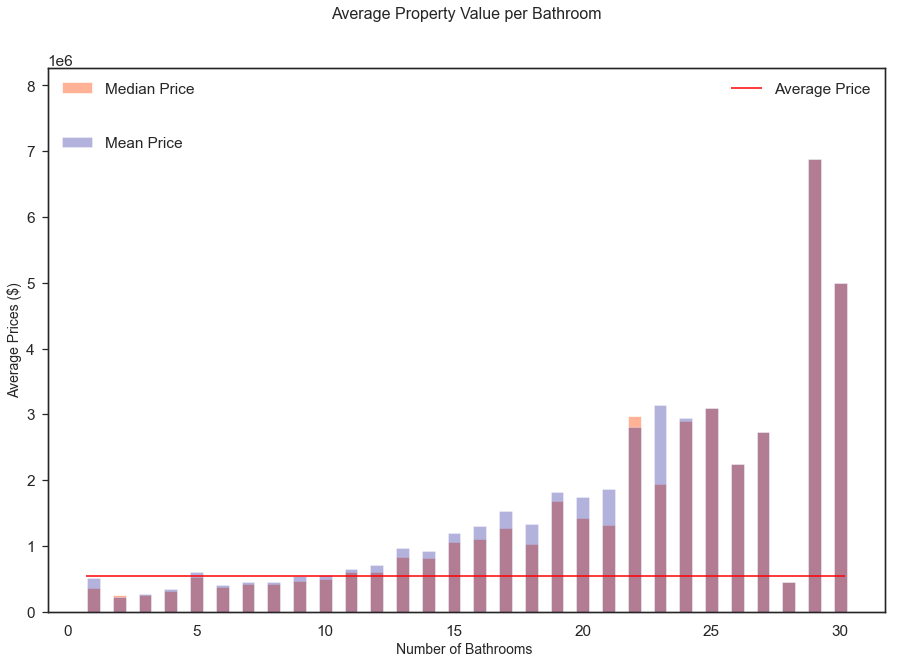

<Figure size 576x396 with 0 Axes>

In [144]:

mean = hf.groupby("bathrooms")["price"].mean()
median = hf.groupby("bathrooms")["price"].median()
mean_data = hf.price.mean()
score = np.arange(1,31)
fig, ax = plt.subplots(figsize=(15,10))
ax2 = ax.twinx() #set ax2 on same x axis as ax
ax3 = ax.twinx() #same as above, for hline
width = 0.5
ax.bar(x=score, height=median, width=width,
       label="Median Price", color="coral", alpha=0.6)
ax2.bar(x=score, height=mean, width=width,
        label="Mean Price", color="darkblue", alpha=0.3)
ax3.hlines(mean_data, .7,30.2, colors="red", label="Average Price")
ax.set_ylim(0,1.2*mean.max())
ax2.set_ylim(0,1.2*mean.max())
ax3.set_ylim(0,1.2*mean.max())
ax2.yaxis.set_visible(False) #hide the 2nd axis
ax3.yaxis.set_visible(False)
ax.legend(bbox_to_anchor=(0,0,1,1), loc="upper left")
ax2.legend(bbox_to_anchor=(0,-.1,1,1), loc="upper left")
ax3.legend(bbox_to_anchor=(0,0,1,1), loc="upper right")
ax.set_ylabel("Average Prices ($)", size=14)
ax.set_xlabel("Number of Bathrooms ", size=14)
plt.title("Average Property Value per Bathroom", size=16, y=1.08)
plt.legend()
plt.show()
plt.savefig('AvgPriceBath')

### fig, ax = plt.subplots(2, 4, figsize=(30, 20))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(hf[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

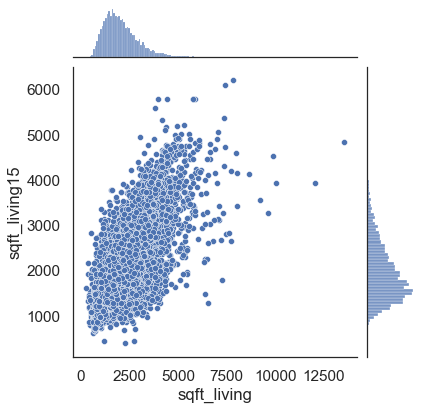

In [44]:
sns.jointplot(x=hf['sqft_living'], y=hf['sqft_living15']);


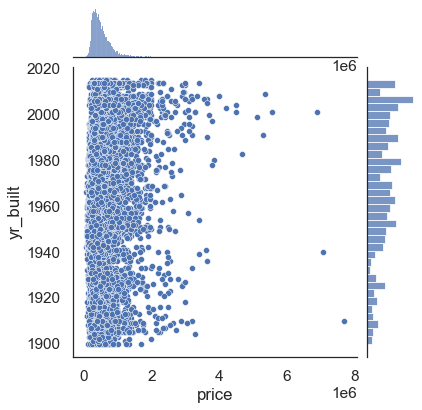

In [45]:
sns.jointplot(x=hf['price'], y=hf['yr_built']);


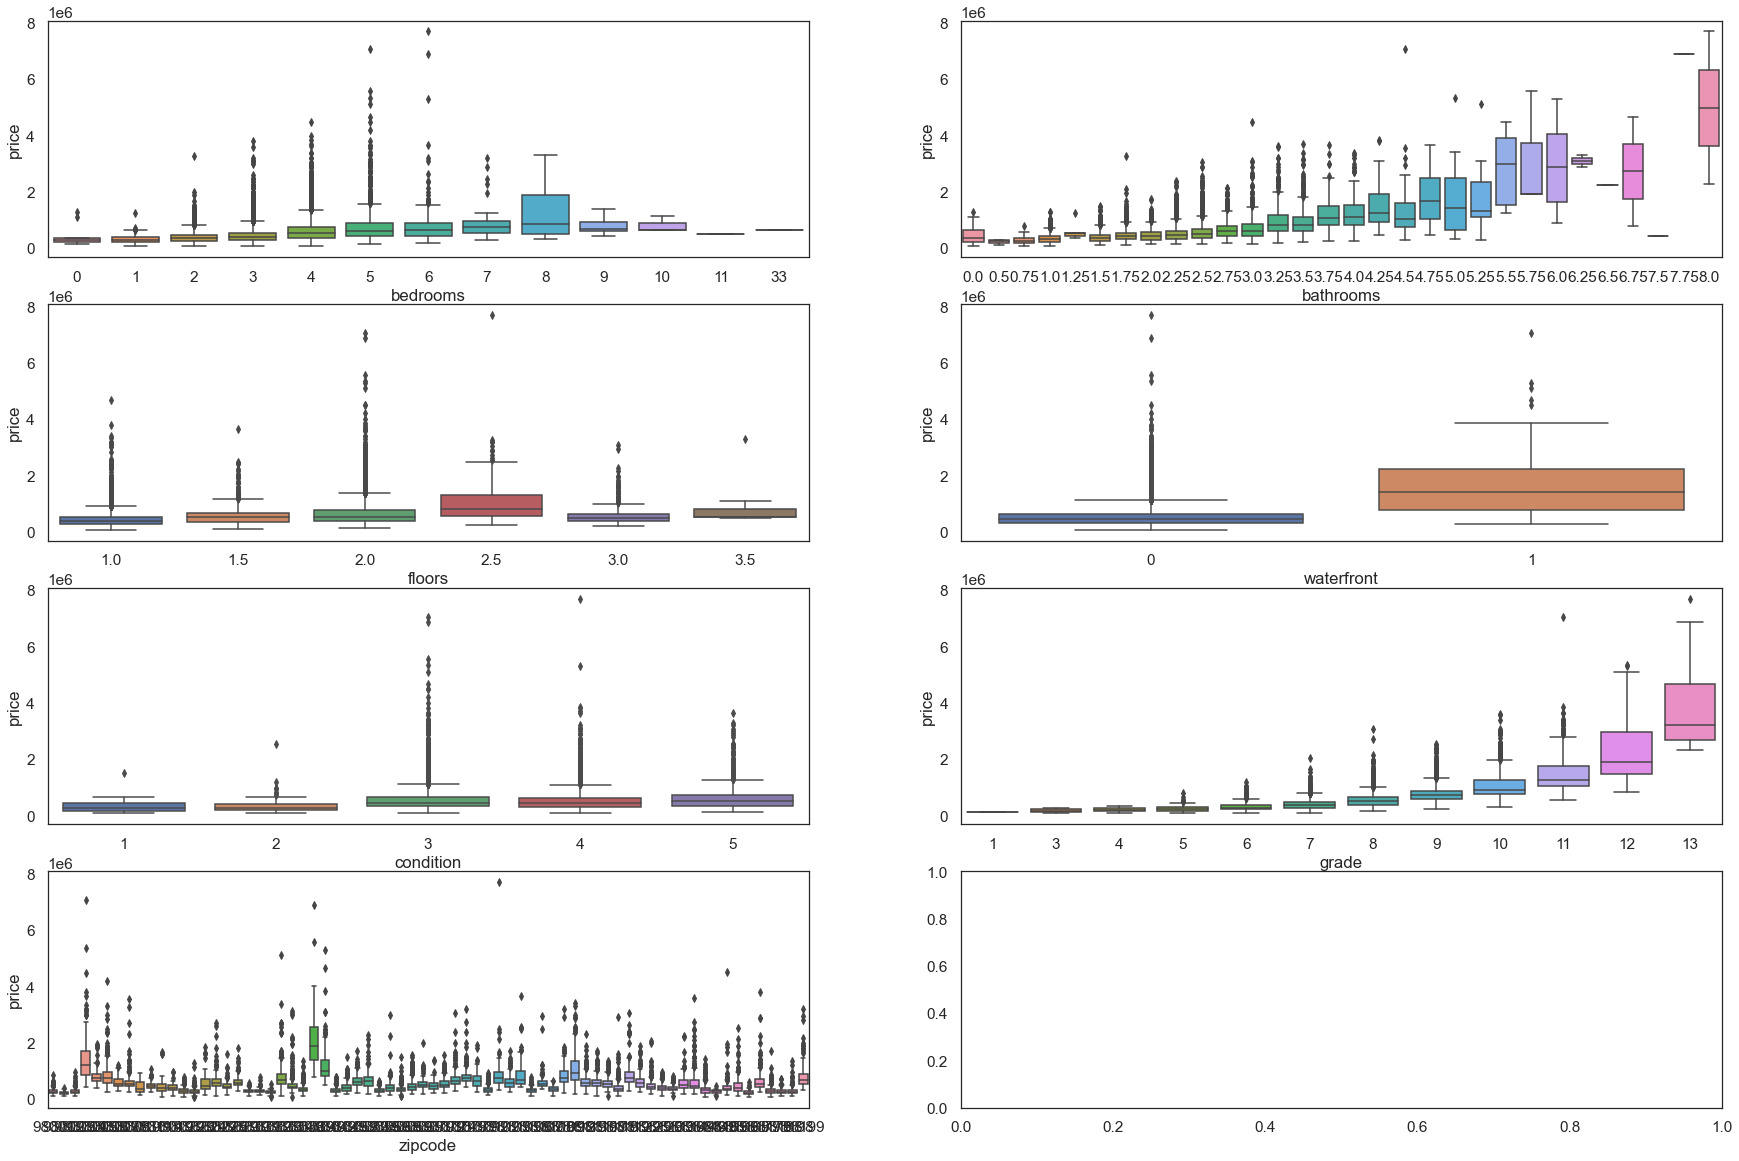

In [46]:

fig, ax = plt.subplots(4, 2, figsize=(30, 20))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='price', data=hf, ax=subplot)

<AxesSubplot:xlabel='zipcode', ylabel='price'>

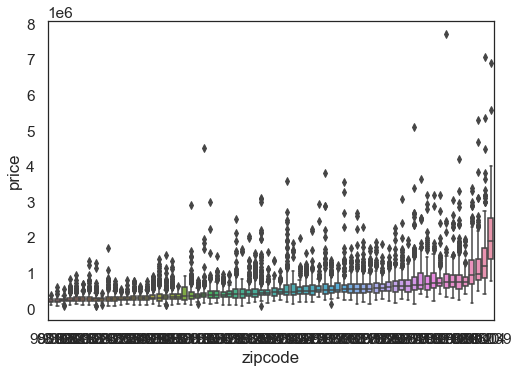

In [47]:
sorted_nb = hf.groupby(['zipcode'])['price'].median().sort_values()
sns.boxplot(x=hf['zipcode'], y=hf['price'], order=list(sorted_nb.index))

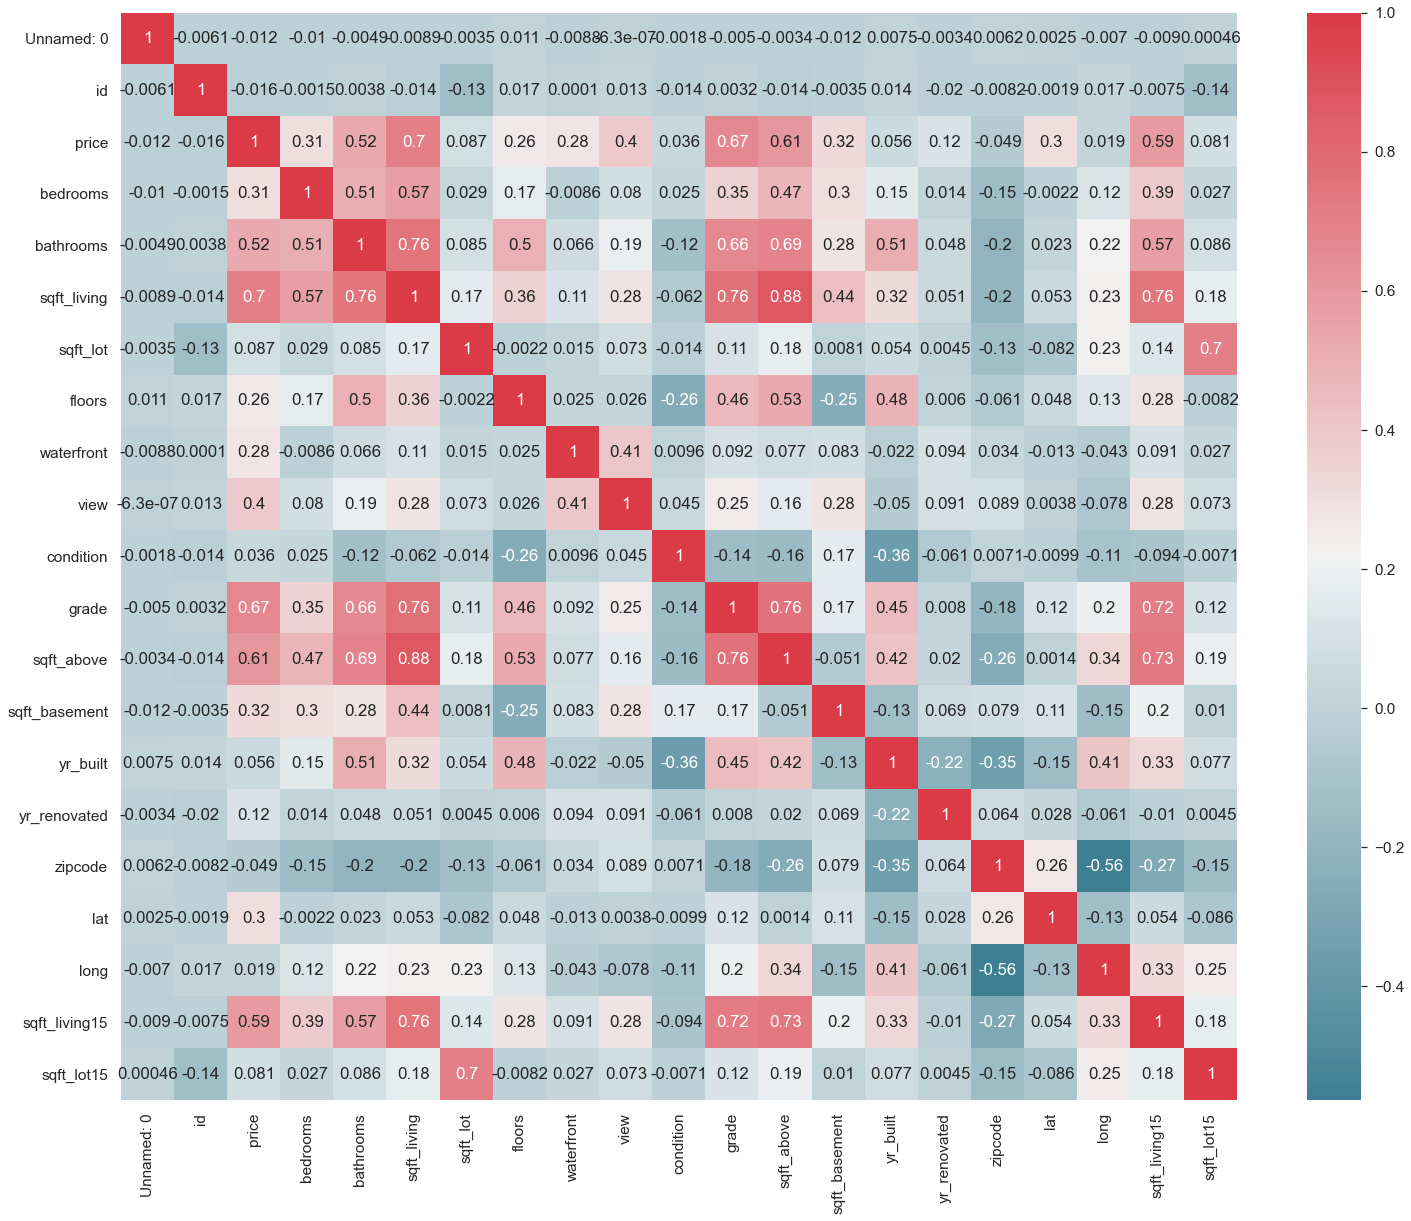

In [48]:
def correlation_heatmap(hf1):
    _,ax=plt.subplots(figsize=(25,20))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(hf.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(hf)

<AxesSubplot:title={'center':'house prices by sqft_above'}, xlabel='sqft_above', ylabel='price'>

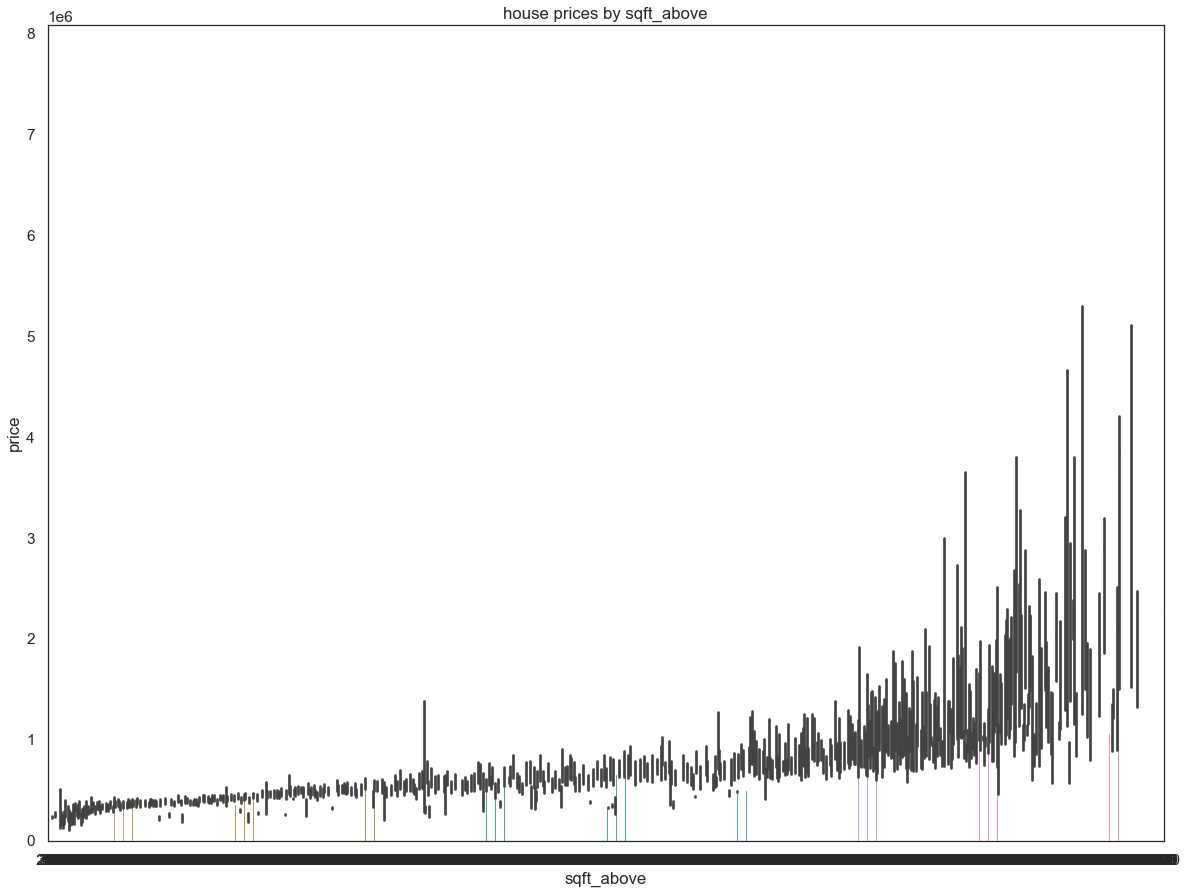

In [49]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(20,15))
plt.title("house prices by sqft_above")
plt.xlabel('sqft_above')
plt.ylabel('house prices')
sns.barplot(x='sqft_above',y='price',data=hf)

In [50]:
nobed = (hf['bedrooms'] == 0 )

In [51]:
hf[(hf['bathrooms'] == 2)]

#avgbathrooms = hf.loc[hf['bathrooms'] == 2].mean('bedrooms')
avgbathrooms =  hf.groupby(hf['bathrooms'] == 1)['bedrooms'].mean()
avgbathrooms[True]

2.6380645161290324

In [52]:
avgbathrooms =  hf.groupby('bathrooms', as_index=False)['bedrooms'].mean()
avgbathrooms

,bathrooms,bedrooms
0,0.00,0.250000
1,0.50,2.333333
2,0.75,1.884615
3,1.00,2.638065
4,1.25,2.000000
5,1.50,3.041096
6,1.75,3.256273
7,2.00,3.316979
8,2.25,3.435174
9,2.50,3.552985


In [53]:
(hf['sqft_living'] == 0)

0        False
1        False
2        False
3        False
4        False
         ...  
17285    False
17286    False
17287    False
17288    False
17289    False
Name: sqft_living, Length: 17290, dtype: bool

## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

In [5]:
hf.shape

(17290, 22)

In [6]:
def zero_val_bed_bath(row):
    """
    Checking extreame number of rooms in the house
    """
    if row['bedrooms'] == 0:
        row['bedrooms'] = row['floors']
    if row['bathrooms'] < 1:
        row['bathrooms'] = 1
    if row['bedrooms'] > 10 :
        row['bedrooms'] = 10
    return row

In [7]:
hf = hf.apply(zero_val_bed_bath, axis = 1)

In [8]:
hf.shape

(17290, 22)

In [9]:
hf.drop(columns = ['Unnamed: 0', 'id', 'view', 'sqft_living15', 'sqft_lot15'], inplace = True)

In [10]:
hf.shape

(17290, 17)

## Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

In [11]:
hf['yr_updated'] = np.nan

In [12]:
def yr_update(row):
    
    if row['yr_renovated'] == 0:
        row['yr_updated'] = 2021 - row['yr_built']
    if row['yr_renovated'] != 0:
        row['yr_updated'] = 2021 - row['yr_built']
        
    return row 
    

In [13]:
hf = hf.apply(yr_update, axis = 1)

In [14]:
hf['yr_ren'] = np.nan

In [15]:
def yr_ren(row):
    
    if row['yr_renovated'] == 0:
        row['yr_ren'] = 0
    if row['yr_renovated'] != 0:
        row['yr_ren'] = 2021 - row['yr_built']
        
    return row 

In [16]:
hf = hf.apply(yr_ren, axis = 1)

In [17]:
hf['percent_bedbath'] = np.nan
hf['has_golden_ratio'] = np.nan

In [18]:
# Based off of bathrooms pros and housetipster 

def ratio_bed_bath(row):
    
    ratio_bed_bath = row['bathrooms'] / row['bedrooms']
    golden_ratio = (2/3)
    row['percent_bedbath'] = abs(golden_ratio - ratio_bed_bath) 
    
    return row

In [19]:
hf = hf.apply(ratio_bed_bath, axis = 1)

In [20]:
def cal_ratio_range(row):
    golden_ratio = (2/3)
    golden_ratio_plus = golden_ratio + (golden_ratio * .10)
    golden_ratio_minus = golden_ratio - (golden_ratio * .10)
    
    if row['percent_bedbath'] <= golden_ratio_plus and row['percent_bedbath'] >= golden_ratio_minus:
            row['has_golden_ratio'] = 1
    else:
        row['has_golden_ratio'] = 0
    
    return row

In [21]:
hf = hf.apply(cal_ratio_range, axis = 1)

In [22]:
hf['ratio_liv_lot'] = np.nan

In [23]:
def ratio_living_lot(row):
    
    row['ratio_liv_lot'] = row['sqft_lot'] / row['sqft_living']
    return row
    

In [24]:
hf = hf.apply(ratio_living_lot, axis = 1)

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [25]:
hf = pd.concat([hf, pd.get_dummies(hf['zipcode'])], 1)

In [26]:
hf = hf.drop(columns = 'zipcode')

In [27]:
hf = pd.concat([hf, pd.get_dummies(hf['grade'])], 1)

In [28]:
hf = hf.drop(columns = 'grade')

In [29]:
hf.columns = hf.columns.astype(str)

In [30]:
# lowest g: 1
# low g: 3 Falls short of minimum building standards. Normally cabin or inferior structure.

# dnmc: 4 Generally older, low quality construction. Does not meet code.

# poor: 5 Low construction costs and workmanship. Small, simple design.

# bare_min: 6 Lowest grade currently meeting building code. Low quality materials and simple designs.

# average: 7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

# above_avg: 8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

# good: 9 Better architectural design with extra interior and exterior design and quality.

# high_qua: 10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

# higher_qua: 11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

# excellent qua: 12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

# mansion: 13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

In [31]:
hf = hf.rename(columns={'1': 'lowest_g', '3': 'low_g', '4':'dnmc', '5':'Poor', '6':'bare_min', 
                   '7':'average', '8':'above_avg', '9':'good', '10':'high_qua', '11':'higher_qua',
                   '12':'excellent_qua', '13':'mansion' })

In [32]:
hf.columns[60:110]

Index(['98092', '98102', '98103', '98105', '98106', '98107', '98108', '98109',
       '98112', '98115', '98116', '98117', '98118', '98119', '98122', '98125',
       '98126', '98133', '98136', '98144', '98146', '98148', '98155', '98166',
       '98168', '98177', '98178', '98188', '98198', '98199', 'lowest_g',
       'low_g', 'dnmc', 'Poor', 'bare_min', 'average', 'above_avg', 'good',
       'high_qua', 'higher_qua', 'excellent_qua', 'mansion'],
      dtype='object')

In [33]:
features = [
        'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'percent_bedbath', 'has_golden_ratio',
       'ratio_liv_lot', 'lowest_g',
       'low_g', 'dnmc', 'Poor', 'bare_min', 'average', 'above_avg', 'good',
       'high_qua', 'higher_qua', 'excellent_qua', 'mansion', '98001', '98002', 
       '98003', '98004', '98005', '98006',
       '98007', '98008', '98010', '98011', '98014', '98019', '98022', '98023',
       '98024', '98027', '98028', '98029', '98030', '98031', '98032', '98033',
       '98034', '98038', '98039', '98040', '98042', '98045', '98052', '98053',
       '98055', '98056', '98058', '98059', '98065', '98070', '98072', '98074',
       '98075', '98077', '98092', '98102', '98103', '98105', '98106', '98107',
       '98108', '98109', '98112', '98115', '98116', '98117',
       '98118', '98119', '98122', '98125', '98126', '98133', '98136', '98144',
       '98146', '98148', '98155', '98166', '98168', '98177', '98178', '98188',
       '98198', '98199']

hf_features = hf[features]
target = hf['price']

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [34]:
# your code here
hf['date'] = pd.to_datetime(hf['date'], format = '%Y/%m/%d')

In [35]:
hf.columns = hf.columns.astype(str)

In [36]:
hf['yr_ren']

0        0
1        0
2        0
3        0
4        0
        ..
17285    0
17286    0
17287    0
17288    0
17289    0
Name: yr_ren, Length: 17290, dtype: int64

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [37]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_basement', 'yr_ren', 'yr_updated']

poly_ft = hf[features]
target = hf['price']

In [38]:
def poly_df (df, degree):
    
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_data = poly.fit_transform(df)
    poly_columns = poly.get_feature_names(df.columns)
    df_poly = pd.DataFrame(poly_data, columns=poly_columns)
    return df_poly

In [39]:
poly_df = poly_df(poly_ft, 2)

In [40]:
lm_2 = LinearRegression()

#fit the linear regression to the data
lm_2 = lm_2.fit(poly_df, target)

In [41]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(poly_df, target, random_state=34,test_size=0.2)


In [42]:
#instantiate a linear regression object
lr_poly = LinearRegression()

#fit the linear regression to the data
lr_poly = lr_poly.fit(X_train_poly, y_train_poly)

In [43]:
train_preds = lr_poly.predict(X_train_poly)

In [44]:
train_rmse_poly = np.sqrt(metrics.mean_squared_error(y_train_poly, train_preds))

print('Root Mean Squared Error:' , train_rmse_poly)

Root Mean Squared Error: 232499.3262754003


### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

In [45]:
# your code here
# waterfront times sqft_lot
hf = pd.concat([hf, pd.get_dummies(hf['waterfront'])], 1)

In [46]:
hf = hf.rename(columns={0: "No_Waterfront", 1: "Waterfront"})

In [47]:
hf['water_sqft_lot'] = np.nan

In [48]:
def water_lot(row):
    if row['waterfront'] == 1:
        row['water_sqft_lot'] = row['Waterfront'] * row['sqft_lot'] 
    if row['waterfront'] == 0:
        row['water_sqft_lot'] = 0
    return row

In [49]:
hf = hf.apply(water_lot, axis=1)

In [50]:
hf = hf.drop(columns='waterfront')

## Step 5: Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

In [51]:
hf.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'sqft_above', 'sqft_basement',
       ...
       'average', 'above_avg', 'good', 'high_qua', 'higher_qua',
       'excellent_qua', 'mansion', 'No_Waterfront', 'Waterfront',
       'water_sqft_lot'],
      dtype='object', length=104)

In [52]:
features = [
         'sqft_lot', 'floors',
        'condition', 'sqft_above',
       'yr_built', 'yr_renovated', 'percent_bedbath', 'has_golden_ratio',
       'ratio_liv_lot', 'lowest_g',
       'low_g', 'dnmc', 'Poor', 'bare_min', 'average', 'above_avg', 'good',
       'high_qua', 'higher_qua', 'excellent_qua', 'mansion', '98001', '98002', 
       '98003', '98004', '98005', '98006',
       '98007', '98008', '98010', '98011', '98014', '98019', '98022', '98023',
       '98024', '98027', '98028', '98029', '98030', '98031', '98032', '98033',
       '98034', '98038', '98039', '98040', '98042', '98045', '98052', '98053',
       '98055', '98056', '98058', '98059', '98065', '98070', '98072', '98074',
       '98075', '98077', '98092', '98102', '98103', '98105', '98106', '98107',
       '98108', '98109', '98112', '98115', '98116', '98117',
       '98118', '98119', '98122', '98125', '98126', '98133', '98136', '98144',
       '98146', '98148', '98155', '98166', '98168', '98177', '98178', '98188',
       '98198', '98199', 'No_Waterfront', 'Waterfront', 'water_sqft_lot']

hf_features = hf[features]
target = hf['price']

### 5.1) Perform a train-test split of the data.

In [53]:
def model_test(df, features, target):
    df_features = df[features]
    X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=34,test_size=0.2)
    #instantiate a linear regression object
    lm = linear_model.LinearRegression()

    #fit the linear regression to the data
    lm = lm.fit(X_train, y_train)
    
    y_train_pred = lm.predict(X_train)
    
    train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
    train_mse = metrics.mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
   
    # Test Set
    y_pred = lm.predict(X_test)
    
    #test_mae = metrics.mean_absolute_error(y_test, y_pred)
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

    #print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
    #print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
    print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

In [54]:
model_test(hf, features, target)

Training:  165070 vs. Testing:  57259600787


### 5.2) Fit your scaler to training the data.

In [55]:
not_poly_fts = [x for x in hf.columns if x not in poly_df]

In [62]:
poly_df = pd.merge(poly_df, hf[not_poly_fts], left_index=True, right_index=True)

In [71]:
poly_df

,bedrooms,bathrooms,sqft_living,sqft_basement,yr_ren,yr_updated,bedrooms^2,bedrooms bathrooms,bedrooms sqft_living,bedrooms sqft_basement,...,average,above_avg,good,high_qua,higher_qua,excellent_qua,mansion,No_Waterfront,Waterfront,water_sqft_lot
0,4.0,2.25,2070.0,0.0,0.0,35.0,16.0,9.0,8280.0,0.0,...,0,1,0,0,0,0,0,1,0,0
1,5.0,3.00,2900.0,1070.0,0.0,44.0,25.0,15.0,14500.0,5350.0,...,0,1,0,0,0,0,0,1,0,0
2,4.0,2.50,3770.0,0.0,0.0,24.0,16.0,10.0,15080.0,0.0,...,0,0,0,0,1,0,0,1,0,0
3,3.0,3.50,4560.0,0.0,0.0,31.0,9.0,10.5,13680.0,0.0,...,0,0,0,0,0,1,0,1,0,0
4,3.0,2.50,2550.0,0.0,0.0,17.0,9.0,7.5,7650.0,0.0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,5.0,2.50,3240.0,1220.0,0.0,63.0,25.0,12.5,16200.0,6100.0,...,0,1,0,0,0,0,0,1,0,0
17286,2.0,1.75,1300.0,0.0,0.0,73.0,4.0,3.5,2600.0,0.0,...,1,0,0,0,0,0,0,1,0,0
17287,3.0,1.00,1050.0,0.0,0.0,68.0,9.0,3.0,3150.0,0.0,...,1,0,0,0,0,0,0,1,0,0
17288,3.0,1.50,1900.0,600.0,0.0,50.0,9.0,4.5,5700.0,1800.0,...,1,0,0,0,0,0,0,1,0,0


In [64]:
X_train, X_test, y_train, y_test = train_test_split(poly_df, target, random_state=34,test_size=0.2)

In [74]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_basement,yr_ren,yr_updated,bedrooms^2,bedrooms bathrooms,bedrooms sqft_living,bedrooms sqft_basement,...,average,above_avg,good,high_qua,higher_qua,excellent_qua,mansion,No_Waterfront,Waterfront,water_sqft_lot
17156,5.0,2.50,2400.0,0.0,0.0,17.0,25.0,12.50,12000.0,0.0,...,1,0,0,0,0,0,0,1,0,0
6138,3.0,1.75,2190.0,0.0,0.0,101.0,9.0,5.25,6570.0,0.0,...,1,0,0,0,0,0,0,1,0,0
6736,3.0,1.50,1460.0,360.0,0.0,50.0,9.0,4.50,4380.0,1080.0,...,1,0,0,0,0,0,0,1,0,0
4449,4.0,1.75,1530.0,0.0,0.0,53.0,16.0,7.00,6120.0,0.0,...,1,0,0,0,0,0,0,1,0,0
3305,2.0,1.00,950.0,0.0,0.0,96.0,4.0,2.00,1900.0,0.0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16708,3.0,2.50,1741.0,0.0,0.0,9.0,9.0,7.50,5223.0,0.0,...,0,1,0,0,0,0,0,1,0,0
3157,4.0,2.25,2470.0,1000.0,0.0,46.0,16.0,9.00,9880.0,4000.0,...,0,1,0,0,0,0,0,1,0,0
10730,3.0,1.00,1250.0,0.0,77.0,77.0,9.0,3.00,3750.0,0.0,...,1,0,0,0,0,0,0,1,0,0
5242,4.0,1.75,3420.0,1650.0,0.0,74.0,16.0,7.00,13680.0,6600.0,...,0,1,0,0,0,0,0,1,0,0


In [65]:
X_train.select_dtypes(include=["number"]).columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_basement', 'yr_ren',
       'yr_updated', 'bedrooms^2', 'bedrooms bathrooms',
       'bedrooms sqft_living', 'bedrooms sqft_basement',
       ...
       'average', 'above_avg', 'good', 'high_qua', 'higher_qua',
       'excellent_qua', 'mansion', 'No_Waterfront', 'Waterfront',
       'water_sqft_lot'],
      dtype='object', length=124)

In [66]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

#transform the training data
scaled_data = scaler.transform(X_train)

TypeError: invalid type promotion

In [61]:
X_train_scaled = pd.DataFrame(data=scaled_data, columns=X_train.columns, index=X_train.index)

NameError: name 'scaled_data' is not defined

### 5.3) Transform the testing set with the scaler.

In [ ]:
#your code here 
scaled_test_data = scaler.transform(X_test)

In [ ]:
X_test_scaled = pd.DataFrame(data=scaled_test_data, columns=X_test.columns, index=X_test.index)

### 5.4) Fit the model to the training data.

In [ ]:
#your code here 
#your code here 
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

### 5.5) Use the model to predict on the training set and the test set.

In [ ]:
#your code here 
y_train_pred = lm.predict(X_train)

y_test_pred = lm.predict(X_test)

### 5.6) Evaluate the training and test predictions using RMSE.

In [ ]:
#your code here 
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Training Root Mean Squared Error:' , train_rmse)
print('Test Root Mean Squared Error:' , test_rmse)

### 5.7) Determine if your model is overfit.

In [ ]:
model_percent = round(((train_rmse - test_rmse)/(train_rmse))*100, 2)

In [ ]:
print("{}% difference".format(model_percent))

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [67]:
# your code here
#F-test
X_train.shape

(13832, 125)

In [68]:
selector = SelectKBest(f_regression, k=70)

selector.fit(X_train, y_train)

TypeError: invalid type promotion

In [ ]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [ ]:
list(removed_columns)

In [ ]:
list(selected_columns)

In [ ]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)

In [ ]:
a = round((testK_rmse - trainK_rmse)/ (trainK_rmse)*100,2)

In [ ]:
a

In [ ]:
#REFECV
from sklearn.feature_selection import RFECV

In [ ]:
ols = linear_model.LinearRegression()

In [ ]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=2, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)


In [ ]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [ ]:
selected_rfe

In [ ]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)



In [ ]:
b = round((testRFE_rmse - trainRFE_rmse)/ (trainRFE_rmse)*100,2)

In [ ]:
b 

In [ ]:
len(selected_rfe)

### 6.2) After removing the features, re-run Step 5 and see if your new model performs better than the old model.

In [ ]:
effect_feat = ['yr_built',
 'percent_bedbath',
 'lowest_g',
 'dnmc',
 'Poor',
 'bare_min',
 'average',
 'above_avg',
 'good',
 'high_qua',
 'higher_qua',
 'excellent_qua',
 'mansion',
 '98001',
 '98002',
 '98003',
 '98004',
 '98005',
 '98006',
 '98007',
 '98008',
 '98010',
 '98011',
 '98014',
 '98019',
 '98022',
 '98023',
 '98024',
 '98027',
 '98028',
 '98029',
 '98030',
 '98031',
 '98032',
 '98033',
 '98034',
 '98038',
 '98039',
 '98040',
 '98042',
 '98045',
 '98052',
 '98053',
 '98055',
 '98056',
 '98058',
 '98059',
 '98065',
 '98070',
 '98072',
 '98074',
 '98075',
 '98077',
 '98092',
 '98102',
 '98103',
 '98105',
 '98106',
 '98107',
 '98108',
 '98109',
 '98112',
 '98115',
 '98116',
 '98117',
 '98118',
 '98119',
 '98122',
 '98125',
 '98133',
 '98136',
 '98144',
 '98146',
 '98148',
 '98155',
 '98166',
 '98168',
 '98177',
 '98178',
 '98188',
 '98198',
 '98199',
 'No_Waterfront',
 'Waterfront',
 'bathrooms',
 'sqft_living',
 'yr_updated']

In [ ]:
final_hf = hf[effect_feat]

In [ ]:
final_hf.shape

## Step 7: Evaluate your different models in order to determine the best model overall.

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

alpha = 0.05 
#ANOVA Test Setup
formula = 'price~C(floors)'
lm_condition = smf.ols(formula, hf).fit()
anova_condition = sm.stats.anova_lm(lm_condition, type=2)
if anova_condition["PR(>F)"][0] < alpha:
    print("The number of floors has a statistically significant impact on average property value")
    print("Conditions F-statisic Probability: ", anova_condition["PR(>F)"][0])

In [ ]:
is_waterfront = hf[(hf['Waterfront'] == 1)]
waterfront_price = is_waterfront.price
no_waterfront = hf[(hf['Waterfront'] == 0)]
notwaterfront_price = no_waterfront.price
alpha = 0.05
waterfront_p_val = stats.ttest_ind(waterfront_price, notwaterfront_price, equal_var=False)[1]
print("Waterfront vs No Waterfront T-test P Value: ", waterfront_p_val)
if waterfront_p_val < alpha:
    print("The P value is less than alpha, reject null-hypothesis")

In [ ]:
alpha = 0.05 
#ANOVA Test Setup
formula = 'price~C(bedrooms)'
lm_condition = smf.ols(formula, hf).fit()
anova_condition = sm.stats.anova_lm(lm_condition, type=2)
if anova_condition["PR(>F)"][0] < alpha:
    print("The number of bedrooms has a statistically significant impact on average property value")
    print("Conditions F-statisic Probability: ", anova_condition["PR(>F)"][0])

## Step 8:  Refit your best model to the entire dataset.

In [ ]:
scale_df.columns

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(final_hf)

In [ ]:
scaled_data = scaler.transform(final_hf)

In [ ]:
hf_features_scaled = pd.DataFrame(data=final_hf[selected_columns], columns=final_hf.columns, index=final_hf.index)

In [ ]:
lm_final = LinearRegression()

#fit the linear regression to the data
lm_final = lm.fit(scale_df[selected_columns], hf['price'])

In [ ]:
    lm_final = LinearRegression()
#     #fit the linear regression to the data
    lm_final = lm_final.fit(final_hf, target)

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [ ]:
import pickle


pickle_out = open("model.pickle","wb")
pickle.dump(lm_final, pickle_out)
pickle_out.close()

# pickle_out = open('scaler.pickle', "wb")
# pickle.dump(scaler, pickle_out)
# pickle_out.close()

In [ ]:
selected_columns

In [ ]:
list(selected_rfe)